In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

In [30]:
df = pd.concat([train, test]).reset_index(drop=True)
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [22]:
df = pd.concat([train, test]).reset_index(drop=True)
df = df.drop(columns=["id"], axis=1)

# get numeric column names without label column
num_cols = df._get_numeric_data().columns

# subract numeric columns and 'attack_cat' column from all columns to get categorical columns 
cat_cols = list(set(data.columns) - set(num_cols) - {'attack_cat'})

print(f"Numerical features: {len(num_cols)}\nCategorical features: {len(cat_cols)}")

Numerical features: 40
Categorical features: 3


In [31]:
pd.concat([pd.get_dummies(df['state']), 
        pd.get_dummies(df['service']), 
        pd.get_dummies(df['proto'])])

,ACC,CLO,CON,ECO,FIN,INT,PAR,REQ,RST,URN,no,-,dhcp,dns,ftp,ftp-data,http,irc,pop3,radius,smtp,snmp,ssh,ssl,3pc,a/n,aes-sp3-d,any,argus,aris,arp,ax.25,bbn-rcc,bna,br-sat-mon,cbt,cftp,chaos,compaq-peer,cphb,cpnx,crtp,crudp,dcn,ddp,ddx,dgp,egp,eigrp,emcon,encap,etherip,fc,fire,ggp,gmtp,gre,hmp,i-nlsp,iatp,ib,icmp,idpr,idpr-cmtp,idrp,ifmp,igmp,igp,il,ip,ipcomp,ipcv,ipip,iplt,ipnip,ippc,ipv6,ipv6-frag,ipv6-no,ipv6-opts,ipv6-route,ipx-n-ip,irtp,isis,iso-ip,iso-tp4,kryptolan,l2tp,larp,leaf-1,leaf-2,merit-inp,mfe-nsp,mhrp,micp,mobile,mtp,mux,narp,netblt,nsfnet-igp,nvp,ospf,pgm,pim,pipe,pnni,pri-enc,prm,ptp,pup,pvp,qnx,rdp,rsvp,rtp,rvd,sat-expak,sat-mon,sccopmce,scps,sctp,sdrp,secure-vmtp,sep,skip,sm,smp,snp,sprite-rpc,sps,srp,st2,stp,sun-nd,swipe,tcf,tcp,tlsp,tp++,trunk-1,trunk-2,ttp,udp,unas,uti,vines,visa,vmtp,vrrp,wb-expak,wb-mon,wsn,xnet,xns-idp,xtp,zero
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [21]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [20]:
len(df.columns)

44

In [19]:
df.djit

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
             ...    
257668      0.000000
257669    120.177727
257670      0.000000
257671      0.000000
257672      0.000000
Name: djit, Length: 257673, dtype: float64

In [17]:
len(df.columns)

44

In [4]:
# one hot encode categorical variables and concatenate them with the numerical variables
dummies_df = pd.concat([
    data[num_cols],
    pd.get_dummies(data['state']), 
    pd.get_dummies(data['service']), 
    pd.get_dummies(data['proto'])], 
    axis=1)

dummies_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,visa,vmtp,vrrp,wb-expak,wb-mon,wsn,xnet,xns-idp,xtp,zero
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
257669,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,...,0,0,0,0,0,0,0,0,0,0
257670,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
257671,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# apply min-max scaler that scales the variables in the range [0-1]
scl = MinMaxScaler()
df = scl.fit_transform(dummies_df)

# apply principal component analysis
pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(df)

pca_df = pd.DataFrame(pca_df)
pca_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.139665,0.691133,0.033781,-0.123732,0.159891,-0.523700,-0.322463,-0.037430,0.125500,0.001090,0.038912,0.111895,0.081098,-0.141533,-0.013122,-0.061079,0.092185,-0.099478
1,1.134885,0.697829,0.023619,-0.127989,0.178153,-0.522009,-0.409717,-0.014354,0.170584,0.007360,0.134525,0.286903,0.003883,-0.126337,0.003497,-0.106215,0.080168,-0.062628
2,1.148204,0.691567,0.016223,-0.125080,0.154072,-0.525683,-0.354547,-0.032282,0.147059,0.004373,0.088459,0.203503,0.058159,-0.152448,0.003864,-0.038568,0.046168,-0.013226
3,1.149644,0.685189,0.015876,-0.127804,0.145047,-0.521827,-0.332389,-0.030487,0.133900,0.003557,0.076222,0.186266,0.069142,-0.143479,-0.002248,-0.047803,0.062347,-0.035391
4,1.137643,0.689183,0.014163,-0.136374,0.167205,-0.515563,-0.412557,0.000424,0.171118,0.009367,0.164773,0.351305,-0.014860,-0.108051,0.003248,-0.138290,0.095059,-0.076184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.625976,-0.681540,-0.287382,-0.071370,-0.202190,0.038976,0.055435,0.029347,-0.052598,-0.001430,-0.014590,0.004202,-0.014239,0.039169,-0.009705,-0.044267,0.049091,-0.045421
257669,-1.524051,0.238075,-0.484932,-0.461644,0.070493,-0.006903,-0.131525,-0.155011,-0.253907,0.035962,0.178556,-0.217753,-0.037990,-0.010673,-0.001146,-0.053777,-0.016547,0.027020
257670,1.505197,-0.506249,-0.119243,0.017648,0.105110,-0.042891,-0.293114,-0.058227,0.133216,-0.005714,-0.080026,-0.265888,-0.128814,-0.093194,0.010285,-0.008992,0.003542,-0.148684
257671,1.668222,-0.740886,-0.346176,-0.105249,-0.311411,0.064058,0.180714,0.060177,-0.114695,0.000400,0.011547,0.102086,0.027500,0.078313,-0.016644,-0.057298,0.063623,-0.022723


In [18]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(data['attack_cat'])
X = pca_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
(X_train.shape, y_train.shape)

((172640, 18), (172640, 10))

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100))

model = mlp.fit(X_train, y_train)

c:\Users\janba\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'log_loss'

In [30]:
model.score(X_test, y_test)

0.7173685510331284

In [21]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
5395/5395 [==============================] - 7s 1ms/step - loss: 11.5900 - accuracy: 0.0045
Epoch 2/10
5395/5395 [==============================] - 7s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 3/10
5395/5395 [==============================] - 7s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 4/10
5395/5395 [==============================] - 7s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 5/10
5395/5395 [==============================] - 7s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 6/10
5395/5395 [==============================] - 7s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 7/10
5395/5395 [==============================] - 6s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 8/10
5395/5395 [==============================] - 7s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 9/10
5395/5395 [==============================] - 6s 1ms/step - loss: 9.7923 - accuracy: 7.2984e-04
Epoch 10/10
5395/5395 [==========================

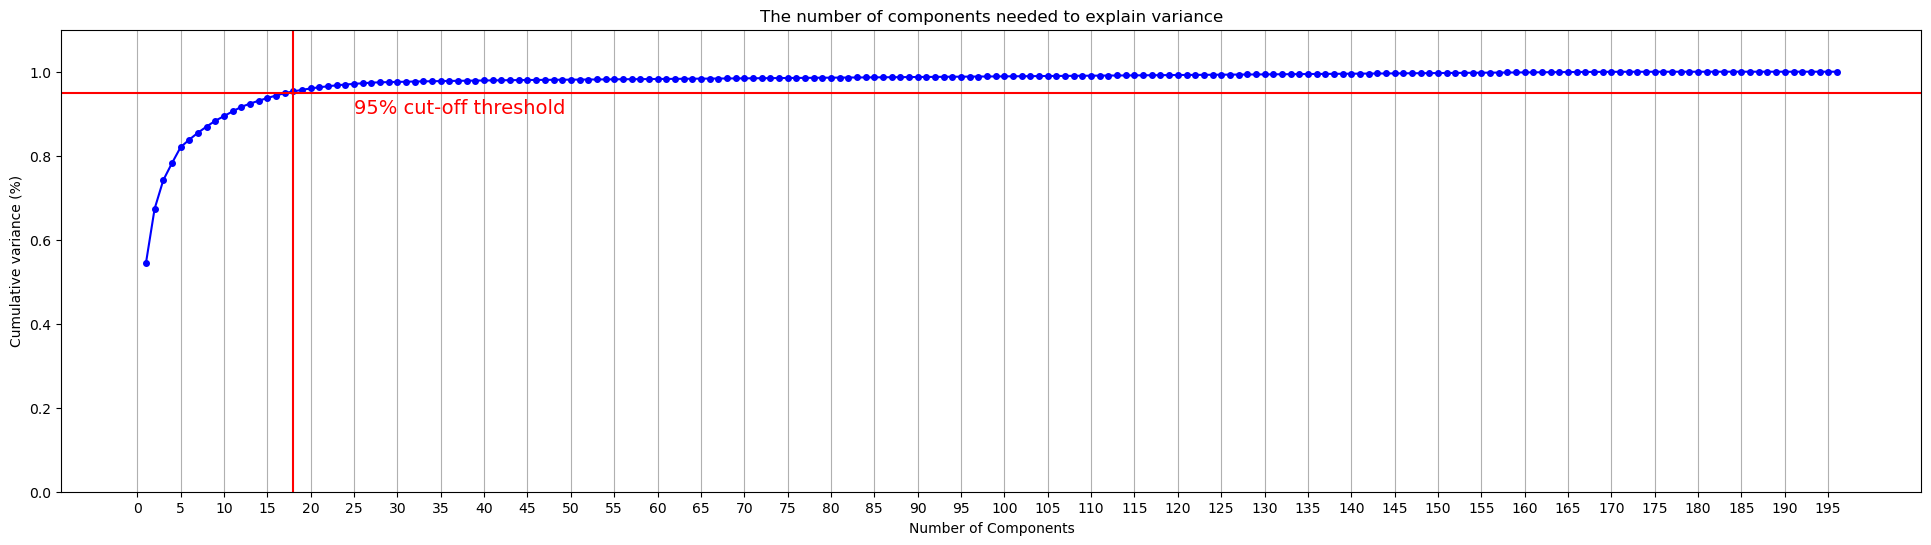

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

def pca_analysis(df: pd.DataFrame, n_components: int):
    scl = MinMaxScaler()
    num_data = scl.fit_transform(df)

    pca = PCA().fit(num_data)

    fig, ax = plt.subplots()
    xi = np.arange(1, n_components+1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.rcParams["figure.figsize"] = (16,6)

    plt.ylim(0.0, 1.1)
    plt.plot(xi, y, marker='o', linestyle='-', color='b', markersize=4)

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, n_components+1, step=5))
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(25, 0.9, '95% cut-off threshold', color='red', fontsize=14)

    # hard coded 
    # TODO: calculate intersection between hline 0.95 and y
    plt.axvline(x=18, color='r', linestyle='-')

    ax.grid(axis='x')
    plt.show()

pca_analysis(dummies_df, dummies_df.shape[1])

In [59]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import prince

# mca = prince.MCA(n_components=-1)
# mca = mca.fit(data[cat_cols])

# data[num_cols] = StandardScaler().fit_transform(data[num_cols])
# pca = PCA(n_components=0.95)
# pca = pca.fit_transform(data[num_cols])

# print(mca.row_contributions_.shape, pca.shape)

(257673, 8) (257673, 21)
